<a href="https://colab.research.google.com/github/MarkG/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) # rectified linear unit - 0 if x is less then 0 otherwise x
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [39]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [47]:
varieties = {}
varieties[0] = "Setosa"
varieties[1] = "Versicolor"
varieties[2] = "Virginica"

for key, variety in varieties.items():
  my_df['variety'] = my_df['variety'].replace(variety, key)
my_df

<ipython-input-47-44d4bbc38b1f>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace(variety, key)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
# Train Test split! Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [20]:
# Convert these to numpyt array
X = X.values
y = y.values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=41)

In [23]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [24]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
# Train our model!
# Epochs - (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get prediction
  y_pred = model.forward(X_train)

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # prediction values bs train values

  # Keep track of losses
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation : take the error rate of forward propogation and feed it back
  # thru the network to fine-tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125523328781128
Epoch: 10 and loss: 1.0191632509231567
Epoch: 20 and loss: 0.8336209654808044
Epoch: 30 and loss: 0.5998520851135254
Epoch: 40 and loss: 0.4106319546699524
Epoch: 50 and loss: 0.27813220024108887
Epoch: 60 and loss: 0.18577773869037628
Epoch: 70 and loss: 0.126749187707901
Epoch: 80 and loss: 0.08892926573753357
Epoch: 90 and loss: 0.06595484912395477


Text(0.5, 0, 'epochs')

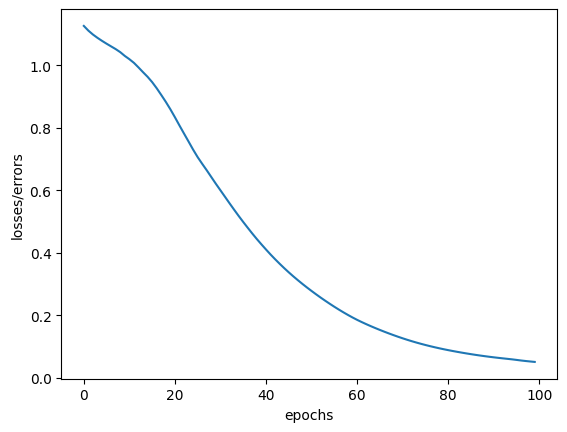

In [30]:
# Graph it all
plt.plot(range(epochs), losses)
plt.ylabel('losses/errors')
plt.xlabel('epochs')

In [31]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Turn off the back propogation
  y_eval = model.forward(X_test) # X_test are features from test set, y_eval will predictions for the test set
  loss = criterion(y_eval, y_test) # find the loss and error

In [32]:
loss

tensor(0.1812)

In [53]:
correct = 0
with torch.no_grad(): # No BP
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    variety = varieties[y_test[i].item()]

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {variety} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if (y_val.argmax().item() == y_test[i]):
      correct += 1
  print (f'We got {correct} corrects')

1.) tensor([-5.4734,  3.9506,  5.9620]) 	 Virginica 	 2 	 2
2.) tensor([-7.3001,  3.7664,  9.2760]) 	 Virginica 	 2 	 2
3.) tensor([-8.0301,  4.5160,  9.5426]) 	 Virginica 	 2 	 2
4.) tensor([-3.5836,  4.8004,  1.7070]) 	 Versicolor 	 1 	 1
5.) tensor([-6.7647,  4.2964,  7.6962]) 	 Virginica 	 2 	 2
6.) tensor([-2.6309,  4.7284,  0.0974]) 	 Versicolor 	 1 	 1
7.) tensor([-5.4319,  4.3484,  5.3815]) 	 Virginica 	 2 	 2
8.) tensor([-3.5266,  4.8569,  1.5413]) 	 Versicolor 	 1 	 1
9.) tensor([-6.0804,  4.3201,  6.5141]) 	 Virginica 	 2 	 2
10.) tensor([-7.7681,  3.9653,  9.8146]) 	 Virginica 	 2 	 2
11.) tensor([-5.1657,  4.3186,  4.9802]) 	 Virginica 	 2 	 2
12.) tensor([ 5.9498, -3.0950, -4.8719]) 	 Setosa 	 0 	 0
13.) tensor([ 5.4756, -2.7278, -4.4701]) 	 Setosa 	 0 	 0
14.) tensor([-1.4361,  3.5588, -0.4646]) 	 Versicolor 	 1 	 1
15.) tensor([ 4.7376, -1.9786, -4.2319]) 	 Setosa 	 0 	 0
16.) tensor([-4.8742,  4.4380,  4.3430]) 	 Virginica 	 2 	 1
17.) tensor([ 5.2865, -2.5212, -4.4430

In [54]:
# test new data point
new_data = torch.tensor([6.3, 2.5, 5.0, 1.9])
with torch.no_grad():
  print(model(new_data))

tensor([-6.0944,  4.1104,  6.7955])


In [55]:
# Save our NN Model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [56]:
# Load our iris model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<ipython-input-56-c17226534dba>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [57]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)